In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


from os import walk

import time
import datetime
%matplotlib inline

In [3]:
X_train = [[1,2,3,4,5,6],
           [1,3,4,5,6,7],
           [1,3,5,4,3,5],
           [2,1,3,4,4,6],
           [1,2,4,3,5,7],

           [5,7,8,9,9,10],
           [4,5,6,7,8,11],
           [5,6,7,8,9,12],
           [5,5,7,8,9,10],
           [6,5,7,8,9,9]]

In [4]:
y_train = [0,0,0,0,0,1,1,1,1,1]

In [5]:
X_test = [[1,3,4,3,5,6],
          [1,2,4,3,5,7],
          [1,2,3,5,4,6],
          [1,2,3,4,3,7],
         
          [4,5,6,7,8,12],
          [4,5,6,7,9,10],
          [5,4,7,8,9,10],
          [5,6,7,9,8,12]]

In [6]:
y_test = [0,0,0,0,1,1,1,1]

## Support Vector Machine

In [7]:
model = svm.SVC(kernel='linear', decision_function_shape='ovo')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_predict = model.predict(X_test)

In [9]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

In [10]:
y_test

[0, 0, 0, 0, 1, 1, 1, 1]

In [11]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

,0,1
0,4,0
1,0,4


In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



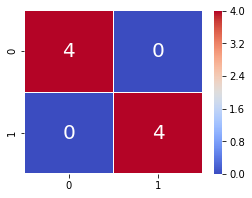

In [13]:
plt.figure(figsize=(4, 3))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Naive Bayes

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_predict = model.predict(X_test)

In [16]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

## Neural Network

In [25]:
model = Sequential()
model.add(Dense(6, activation='relu', kernel_initializer='he_normal', input_shape=(6,)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=3000, 
          validation_data=(X_test, y_test),
          batch_size=64, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/3000
1/1 [==============================] - 1s 602ms/step - loss: 10.7218 - accuracy: 0.5000 - val_loss: 11.0060 - val_accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 1s 560ms/step - loss: 10.5407 - accuracy: 0.5000 - val_loss: 10.8222 - val_accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 57ms/step - loss: 10.3611 - accuracy: 0.5000 - val_loss: 10.6400 - val_accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 48ms/step - loss: 10.1866 - accuracy: 0.5000 - val_loss: 10.4599 - val_accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 50ms/step - loss: 10.0145 - accuracy: 0.5000 - val_loss: 10.2817 - val_accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 47ms/step - loss: 9.8447 - accuracy: 0.5000 - val_loss: 10.1060 - val_accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 55ms/step - loss: 9.6786 - accuracy: 0.5000 - val_loss: 9.9339 - val_accuracy: 0.5000


1/1 [==============================] - 0s 63ms/step - loss: 2.8990 - accuracy: 0.5000 - val_loss: 3.0942 - val_accuracy: 0.5000
Epoch 59/3000
1/1 [==============================] - 0s 63ms/step - loss: 2.7953 - accuracy: 0.5000 - val_loss: 2.9875 - val_accuracy: 0.5000
Epoch 60/3000
1/1 [==============================] - 0s 107ms/step - loss: 2.7011 - accuracy: 0.4000 - val_loss: 2.8832 - val_accuracy: 0.5000
Epoch 61/3000
1/1 [==============================] - 0s 62ms/step - loss: 2.6063 - accuracy: 0.4000 - val_loss: 2.7804 - val_accuracy: 0.5000
Epoch 62/3000
1/1 [==============================] - 0s 76ms/step - loss: 2.5121 - accuracy: 0.4000 - val_loss: 2.6787 - val_accuracy: 0.5000
Epoch 63/3000
1/1 [==============================] - 0s 63ms/step - loss: 2.4143 - accuracy: 0.4000 - val_loss: 2.5782 - val_accuracy: 0.5000
Epoch 64/3000
1/1 [==============================] - 0s 62ms/step - loss: 2.3176 - accuracy: 0.4000 - val_loss: 2.4789 - val_accuracy: 0.5000
Epoch 65/3000
1/1 [

1/1 [==============================] - 0s 60ms/step - loss: 0.6427 - accuracy: 0.7000 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 116/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6442 - accuracy: 0.7000 - val_loss: 0.7112 - val_accuracy: 0.5000
Epoch 117/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.6453 - accuracy: 0.7000 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 118/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6460 - accuracy: 0.7000 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 119/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6462 - accuracy: 0.7000 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 120/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.6463 - accuracy: 0.7000 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 121/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6462 - accuracy: 0.7000 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 122/30

1/1 [==============================] - 0s 71ms/step - loss: 0.6173 - accuracy: 0.7000 - val_loss: 0.7219 - val_accuracy: 0.5000
Epoch 173/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.6170 - accuracy: 0.7000 - val_loss: 0.7220 - val_accuracy: 0.5000
Epoch 174/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.6167 - accuracy: 0.7000 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 175/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.6164 - accuracy: 0.7000 - val_loss: 0.7222 - val_accuracy: 0.5000
Epoch 176/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.6161 - accuracy: 0.7000 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 177/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.6159 - accuracy: 0.7000 - val_loss: 0.7218 - val_accuracy: 0.5000
Epoch 178/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.6156 - accuracy: 0.7000 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 179/300

1/1 [==============================] - 0s 48ms/step - loss: 0.6024 - accuracy: 0.7000 - val_loss: 0.7099 - val_accuracy: 0.6250
Epoch 230/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.6021 - accuracy: 0.7000 - val_loss: 0.7096 - val_accuracy: 0.6250
Epoch 231/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.6019 - accuracy: 0.7000 - val_loss: 0.7093 - val_accuracy: 0.6250
Epoch 232/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.6016 - accuracy: 0.7000 - val_loss: 0.7090 - val_accuracy: 0.6250
Epoch 233/3000
1/1 [==============================] - 0s 113ms/step - loss: 0.6014 - accuracy: 0.7000 - val_loss: 0.7087 - val_accuracy: 0.6250
Epoch 234/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6011 - accuracy: 0.7000 - val_loss: 0.7084 - val_accuracy: 0.6250
Epoch 235/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.6009 - accuracy: 0.7000 - val_loss: 0.7081 - val_accuracy: 0.6250
Epoch 236/30

1/1 [==============================] - 0s 119ms/step - loss: 0.5878 - accuracy: 0.7000 - val_loss: 0.6854 - val_accuracy: 0.6250
Epoch 287/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5875 - accuracy: 0.7000 - val_loss: 0.6848 - val_accuracy: 0.6250
Epoch 288/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.5872 - accuracy: 0.7000 - val_loss: 0.6843 - val_accuracy: 0.6250
Epoch 289/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.5869 - accuracy: 0.7000 - val_loss: 0.6837 - val_accuracy: 0.6250
Epoch 290/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5867 - accuracy: 0.7000 - val_loss: 0.6831 - val_accuracy: 0.6250
Epoch 291/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.5864 - accuracy: 0.7000 - val_loss: 0.6825 - val_accuracy: 0.6250
Epoch 292/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5861 - accuracy: 0.7000 - val_loss: 0.6820 - val_accuracy: 0.6250
Epoch 293/300

1/1 [==============================] - 0s 55ms/step - loss: 0.5716 - accuracy: 0.8000 - val_loss: 0.6514 - val_accuracy: 0.6250
Epoch 344/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5713 - accuracy: 0.8000 - val_loss: 0.6508 - val_accuracy: 0.6250
Epoch 345/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.5710 - accuracy: 0.8000 - val_loss: 0.6502 - val_accuracy: 0.6250
Epoch 346/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.5707 - accuracy: 0.8000 - val_loss: 0.6496 - val_accuracy: 0.6250
Epoch 347/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.5704 - accuracy: 0.8000 - val_loss: 0.6490 - val_accuracy: 0.6250
Epoch 348/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.5701 - accuracy: 0.8000 - val_loss: 0.6483 - val_accuracy: 0.6250
Epoch 349/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5698 - accuracy: 0.8000 - val_loss: 0.6477 - val_accuracy: 0.6250
Epoch 350/300

1/1 [==============================] - 0s 49ms/step - loss: 0.5545 - accuracy: 0.8000 - val_loss: 0.6232 - val_accuracy: 0.6250
Epoch 401/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.5542 - accuracy: 0.8000 - val_loss: 0.6230 - val_accuracy: 0.6250
Epoch 402/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.5539 - accuracy: 0.8000 - val_loss: 0.6227 - val_accuracy: 0.6250
Epoch 403/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.5536 - accuracy: 0.8000 - val_loss: 0.6223 - val_accuracy: 0.6250
Epoch 404/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5533 - accuracy: 0.8000 - val_loss: 0.6217 - val_accuracy: 0.6250
Epoch 405/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.5530 - accuracy: 0.8000 - val_loss: 0.6211 - val_accuracy: 0.6250
Epoch 406/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.5527 - accuracy: 0.8000 - val_loss: 0.6204 - val_accuracy: 0.6250
Epoch 407/3000

1/1 [==============================] - 0s 52ms/step - loss: 0.5385 - accuracy: 0.8000 - val_loss: 0.6010 - val_accuracy: 0.6250
Epoch 458/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5381 - accuracy: 0.8000 - val_loss: 0.6019 - val_accuracy: 0.6250
Epoch 459/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.5378 - accuracy: 0.8000 - val_loss: 0.6024 - val_accuracy: 0.6250
Epoch 460/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.5376 - accuracy: 0.8000 - val_loss: 0.6025 - val_accuracy: 0.6250
Epoch 461/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.5374 - accuracy: 0.8000 - val_loss: 0.6023 - val_accuracy: 0.6250
Epoch 462/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.5371 - accuracy: 0.8000 - val_loss: 0.6016 - val_accuracy: 0.6250
Epoch 463/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.5368 - accuracy: 0.8000 - val_loss: 0.6007 - val_accuracy: 0.6250
Epoch 464/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.5235 - accuracy: 0.8000 - val_loss: 0.5824 - val_accuracy: 0.6250
Epoch 515/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.5231 - accuracy: 0.8000 - val_loss: 0.5805 - val_accuracy: 0.6250
Epoch 516/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.5232 - accuracy: 0.8000 - val_loss: 0.5799 - val_accuracy: 0.6250
Epoch 517/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5230 - accuracy: 0.8000 - val_loss: 0.5805 - val_accuracy: 0.6250
Epoch 518/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.5225 - accuracy: 0.8000 - val_loss: 0.5820 - val_accuracy: 0.6250
Epoch 519/3000
1/1 [==============================] - 0s 105ms/step - loss: 0.5223 - accuracy: 0.8000 - val_loss: 0.5828 - val_accuracy: 0.6250
Epoch 520/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.5222 - accuracy: 0.8000 - val_loss: 0.5828 - val_accuracy: 0.6250
Epoch 521/300

1/1 [==============================] - 0s 57ms/step - loss: 0.5024 - accuracy: 0.8000 - val_loss: 0.6185 - val_accuracy: 0.6250
Epoch 572/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.5020 - accuracy: 0.8000 - val_loss: 0.6190 - val_accuracy: 0.6250
Epoch 573/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.5015 - accuracy: 0.8000 - val_loss: 0.6190 - val_accuracy: 0.6250
Epoch 574/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.5010 - accuracy: 0.8000 - val_loss: 0.6187 - val_accuracy: 0.6250
Epoch 575/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.6180 - val_accuracy: 0.6250
Epoch 576/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.4999 - accuracy: 0.8000 - val_loss: 0.6169 - val_accuracy: 0.6250
Epoch 577/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.4994 - accuracy: 0.8000 - val_loss: 0.6155 - val_accuracy: 0.6250
Epoch 578/3000

1/1 [==============================] - 0s 60ms/step - loss: 0.4700 - accuracy: 0.9000 - val_loss: 0.5568 - val_accuracy: 0.6250
Epoch 629/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.4694 - accuracy: 0.9000 - val_loss: 0.5557 - val_accuracy: 0.6250
Epoch 630/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.4688 - accuracy: 0.9000 - val_loss: 0.5545 - val_accuracy: 0.6250
Epoch 631/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.4682 - accuracy: 0.9000 - val_loss: 0.5533 - val_accuracy: 0.6250
Epoch 632/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.4676 - accuracy: 0.9000 - val_loss: 0.5521 - val_accuracy: 0.6250
Epoch 633/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.4670 - accuracy: 0.9000 - val_loss: 0.5508 - val_accuracy: 0.6250
Epoch 634/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.4664 - accuracy: 0.9000 - val_loss: 0.5495 - val_accuracy: 0.6250
Epoch 635/3

1/1 [==============================] - 0s 53ms/step - loss: 0.4383 - accuracy: 0.9000 - val_loss: 0.5141 - val_accuracy: 0.6250
Epoch 686/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.4377 - accuracy: 0.9000 - val_loss: 0.5120 - val_accuracy: 0.6250
Epoch 687/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.4371 - accuracy: 0.9000 - val_loss: 0.5125 - val_accuracy: 0.6250
Epoch 688/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.4367 - accuracy: 0.9000 - val_loss: 0.5124 - val_accuracy: 0.6250
Epoch 689/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.4362 - accuracy: 0.9000 - val_loss: 0.5119 - val_accuracy: 0.6250
Epoch 690/3000
1/1 [==============================] - 0s 103ms/step - loss: 0.4358 - accuracy: 0.9000 - val_loss: 0.5108 - val_accuracy: 0.6250
Epoch 691/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.4352 - accuracy: 0.9000 - val_loss: 0.5092 - val_accuracy: 0.6250
Epoch 692/30

1/1 [==============================] - 0s 59ms/step - loss: 0.4135 - accuracy: 0.9000 - val_loss: 0.4781 - val_accuracy: 0.8750
Epoch 743/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.4127 - accuracy: 0.9000 - val_loss: 0.4765 - val_accuracy: 0.8750
Epoch 744/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.4126 - accuracy: 0.9000 - val_loss: 0.4774 - val_accuracy: 0.8750
Epoch 745/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.4119 - accuracy: 0.9000 - val_loss: 0.4770 - val_accuracy: 0.8750
Epoch 746/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.4115 - accuracy: 0.9000 - val_loss: 0.4753 - val_accuracy: 0.8750
Epoch 747/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.4113 - accuracy: 0.9000 - val_loss: 0.4761 - val_accuracy: 0.8750
Epoch 748/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.4108 - accuracy: 0.9000 - val_loss: 0.4755 - val_accuracy: 0.8750
Epoch 749/300

1/1 [==============================] - 0s 54ms/step - loss: 0.3918 - accuracy: 0.9000 - val_loss: 0.4491 - val_accuracy: 0.8750
Epoch 800/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.3914 - accuracy: 0.9000 - val_loss: 0.4462 - val_accuracy: 0.8750
Epoch 801/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.3915 - accuracy: 0.9000 - val_loss: 0.4457 - val_accuracy: 0.8750
Epoch 802/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.3912 - accuracy: 0.9000 - val_loss: 0.4473 - val_accuracy: 0.8750
Epoch 803/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3904 - accuracy: 0.9000 - val_loss: 0.4509 - val_accuracy: 0.8750
Epoch 804/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.3907 - accuracy: 0.9000 - val_loss: 0.4521 - val_accuracy: 0.8750
Epoch 805/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.3907 - accuracy: 0.9000 - val_loss: 0.4510 - val_accuracy: 0.8750
Epoch 806/3000

1/1 [==============================] - 0s 127ms/step - loss: 0.3757 - accuracy: 0.9000 - val_loss: 0.4232 - val_accuracy: 0.8750
Epoch 857/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3755 - accuracy: 0.9000 - val_loss: 0.4225 - val_accuracy: 0.8750
Epoch 858/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.3753 - accuracy: 0.9000 - val_loss: 0.4236 - val_accuracy: 0.8750
Epoch 859/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.3748 - accuracy: 0.9000 - val_loss: 0.4265 - val_accuracy: 0.8750
Epoch 860/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.3751 - accuracy: 0.9000 - val_loss: 0.4264 - val_accuracy: 0.8750
Epoch 861/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.3749 - accuracy: 0.9000 - val_loss: 0.4235 - val_accuracy: 0.8750
Epoch 862/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.3742 - accuracy: 0.9000 - val_loss: 0.4183 - val_accuracy: 0.8750
Epoch 863/3

1/1 [==============================] - 0s 54ms/step - loss: 0.3632 - accuracy: 0.9000 - val_loss: 0.4051 - val_accuracy: 0.8750
Epoch 914/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.3617 - accuracy: 0.9000 - val_loss: 0.4099 - val_accuracy: 0.8750
Epoch 915/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.3609 - accuracy: 0.9000 - val_loss: 0.4148 - val_accuracy: 0.8750
Epoch 916/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.3600 - accuracy: 0.9000 - val_loss: 0.4196 - val_accuracy: 0.8750
Epoch 917/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.3591 - accuracy: 0.9000 - val_loss: 0.4240 - val_accuracy: 0.8750
Epoch 918/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.3583 - accuracy: 0.9000 - val_loss: 0.4280 - val_accuracy: 0.8750
Epoch 919/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.3573 - accuracy: 0.9000 - val_loss: 0.4313 - val_accuracy: 0.7500
Epoch 920/30

1/1 [==============================] - 0s 63ms/step - loss: 0.2929 - accuracy: 1.0000 - val_loss: 0.3718 - val_accuracy: 0.8750
Epoch 971/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2920 - accuracy: 1.0000 - val_loss: 0.3737 - val_accuracy: 0.8750
Epoch 972/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2913 - accuracy: 1.0000 - val_loss: 0.3731 - val_accuracy: 0.8750
Epoch 973/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2903 - accuracy: 1.0000 - val_loss: 0.3703 - val_accuracy: 0.8750
Epoch 974/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.2892 - accuracy: 1.0000 - val_loss: 0.3656 - val_accuracy: 0.8750
Epoch 975/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.2880 - accuracy: 1.0000 - val_loss: 0.3652 - val_accuracy: 0.8750
Epoch 976/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.2870 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.8750
Epoch 977/300

1/1 [==============================] - 0s 62ms/step - loss: 0.2535 - accuracy: 1.0000 - val_loss: 0.3487 - val_accuracy: 0.8750
Epoch 1028/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2540 - accuracy: 1.0000 - val_loss: 0.3494 - val_accuracy: 0.8750
Epoch 1029/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.2537 - accuracy: 1.0000 - val_loss: 0.3458 - val_accuracy: 0.8750
Epoch 1030/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2527 - accuracy: 1.0000 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 1031/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2520 - accuracy: 1.0000 - val_loss: 0.3342 - val_accuracy: 0.8750
Epoch 1032/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2520 - accuracy: 1.0000 - val_loss: 0.3330 - val_accuracy: 0.8750
Epoch 1033/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.2516 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.8750
Epoch 10

Epoch 1084/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.2317 - accuracy: 1.0000 - val_loss: 0.3208 - val_accuracy: 0.8750
Epoch 1085/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.2310 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.8750
Epoch 1086/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2309 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.8750
Epoch 1087/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.2306 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 0.8750
Epoch 1088/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.2299 - accuracy: 1.0000 - val_loss: 0.3182 - val_accuracy: 0.8750
Epoch 1089/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.2298 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.8750
Epoch 1090/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2295 - accuracy: 1.0000 - val_loss: 0.3186 - val_accuracy

Epoch 1141/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2150 - accuracy: 1.0000 - val_loss: 0.3024 - val_accuracy: 0.8750
Epoch 1142/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.2148 - accuracy: 1.0000 - val_loss: 0.3028 - val_accuracy: 0.8750
Epoch 1143/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.2145 - accuracy: 1.0000 - val_loss: 0.3045 - val_accuracy: 0.8750
Epoch 1144/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.2142 - accuracy: 1.0000 - val_loss: 0.3074 - val_accuracy: 0.8750
Epoch 1145/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.2138 - accuracy: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.8750
Epoch 1146/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.2143 - accuracy: 1.0000 - val_loss: 0.3091 - val_accuracy: 0.8750
Epoch 1147/3000
1/1 [==============================] - 0s 113ms/step - loss: 0.2136 - accuracy: 1.0000 - val_loss: 0.3017 - val_accura

Epoch 1198/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.2020 - accuracy: 1.0000 - val_loss: 0.2890 - val_accuracy: 0.8750
Epoch 1199/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.2018 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.8750
Epoch 1200/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.2015 - accuracy: 1.0000 - val_loss: 0.2916 - val_accuracy: 0.8750
Epoch 1201/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.2012 - accuracy: 1.0000 - val_loss: 0.2938 - val_accuracy: 0.8750
Epoch 1202/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.2009 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.8750
Epoch 1203/3000
1/1 [==============================] - 0s 159ms/step - loss: 0.2011 - accuracy: 1.0000 - val_loss: 0.2947 - val_accuracy: 0.8750
Epoch 1204/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.2004 - accuracy: 1.0000 - val_loss: 0.2889 - val_accurac

Epoch 1255/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1906 - accuracy: 1.0000 - val_loss: 0.2802 - val_accuracy: 0.8750
Epoch 1256/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.1904 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.8750
Epoch 1257/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1902 - accuracy: 1.0000 - val_loss: 0.2830 - val_accuracy: 0.8750
Epoch 1258/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.1899 - accuracy: 1.0000 - val_loss: 0.2851 - val_accuracy: 0.8750
Epoch 1259/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.1900 - accuracy: 1.0000 - val_loss: 0.2827 - val_accuracy: 0.8750
Epoch 1260/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1895 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.8750
Epoch 1261/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.1894 - accuracy: 1.0000 - val_loss: 0.2802 - val_accura

Epoch 1312/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1806 - accuracy: 1.0000 - val_loss: 0.2702 - val_accuracy: 0.8750
Epoch 1313/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1804 - accuracy: 1.0000 - val_loss: 0.2695 - val_accuracy: 0.8750
Epoch 1314/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1803 - accuracy: 1.0000 - val_loss: 0.2694 - val_accuracy: 0.8750
Epoch 1315/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1801 - accuracy: 1.0000 - val_loss: 0.2699 - val_accuracy: 0.8750
Epoch 1316/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1799 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.8750
Epoch 1317/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1797 - accuracy: 1.0000 - val_loss: 0.2721 - val_accuracy: 0.8750
Epoch 1318/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1795 - accuracy: 1.0000 - val_loss: 0.2738 - val_accuracy:

Epoch 1369/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1715 - accuracy: 1.0000 - val_loss: 0.2623 - val_accuracy: 0.8750
Epoch 1370/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.1714 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.8750
Epoch 1371/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1713 - accuracy: 1.0000 - val_loss: 0.2589 - val_accuracy: 0.8750
Epoch 1372/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1712 - accuracy: 1.0000 - val_loss: 0.2581 - val_accuracy: 0.8750
Epoch 1373/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.1711 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.8750
Epoch 1374/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1709 - accuracy: 1.0000 - val_loss: 0.2581 - val_accuracy: 0.8750
Epoch 1375/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1708 - accuracy: 1.0000 - val_loss: 0.2588 - val_accurac

Epoch 1426/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1632 - accuracy: 1.0000 - val_loss: 0.2511 - val_accuracy: 0.8750
Epoch 1427/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1631 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.8750
Epoch 1428/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.1629 - accuracy: 1.0000 - val_loss: 0.2520 - val_accuracy: 0.8750
Epoch 1429/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1627 - accuracy: 1.0000 - val_loss: 0.2530 - val_accuracy: 0.8750
Epoch 1430/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.1625 - accuracy: 1.0000 - val_loss: 0.2544 - val_accuracy: 0.8750
Epoch 1431/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1624 - accuracy: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.8750
Epoch 1432/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1624 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy

Epoch 1483/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1553 - accuracy: 1.0000 - val_loss: 0.2416 - val_accuracy: 0.8750
Epoch 1484/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1552 - accuracy: 1.0000 - val_loss: 0.2408 - val_accuracy: 0.8750
Epoch 1485/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1551 - accuracy: 1.0000 - val_loss: 0.2405 - val_accuracy: 0.8750
Epoch 1486/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1550 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.8750
Epoch 1487/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1548 - accuracy: 1.0000 - val_loss: 0.2410 - val_accuracy: 0.8750
Epoch 1488/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1547 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.8750
Epoch 1489/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.1546 - accuracy: 1.0000 - val_loss: 0.2428 - val_accuracy

Epoch 1540/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1482 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.8750
Epoch 1541/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1481 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.8750
Epoch 1542/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1480 - accuracy: 1.0000 - val_loss: 0.2316 - val_accuracy: 0.8750
Epoch 1543/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1479 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.8750
Epoch 1544/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1478 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.8750
Epoch 1545/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1476 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.8750
Epoch 1546/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1475 - accuracy: 1.0000 - val_loss: 0.2337 - val_accuracy:

Epoch 1597/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1416 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.8750
Epoch 1598/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1415 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.8750
Epoch 1599/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1413 - accuracy: 1.0000 - val_loss: 0.2324 - val_accuracy: 0.8750
Epoch 1600/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1412 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.8750
Epoch 1601/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1411 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.8750
Epoch 1602/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1410 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.8750
Epoch 1603/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1409 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy:

Epoch 1654/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1355 - accuracy: 1.0000 - val_loss: 0.2267 - val_accuracy: 0.8750
Epoch 1655/3000
1/1 [==============================] - 0s 126ms/step - loss: 0.1353 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.8750
Epoch 1656/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1355 - accuracy: 1.0000 - val_loss: 0.2251 - val_accuracy: 0.8750
Epoch 1657/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.1351 - accuracy: 1.0000 - val_loss: 0.2225 - val_accuracy: 0.8750
Epoch 1658/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1351 - accuracy: 1.0000 - val_loss: 0.2204 - val_accuracy: 0.8750
Epoch 1659/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1350 - accuracy: 1.0000 - val_loss: 0.2186 - val_accuracy: 0.8750
Epoch 1660/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1349 - accuracy: 1.0000 - val_loss: 0.2173 - val_accuracy

Epoch 1711/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1298 - accuracy: 1.0000 - val_loss: 0.2144 - val_accuracy: 0.8750
Epoch 1712/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1297 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.8750
Epoch 1713/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1296 - accuracy: 1.0000 - val_loss: 0.2171 - val_accuracy: 0.8750
Epoch 1714/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.1295 - accuracy: 1.0000 - val_loss: 0.2186 - val_accuracy: 0.8750
Epoch 1715/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1294 - accuracy: 1.0000 - val_loss: 0.2201 - val_accuracy: 0.8750
Epoch 1716/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1296 - accuracy: 1.0000 - val_loss: 0.2168 - val_accuracy: 0.8750
Epoch 1717/3000
1/1 [==============================] - 0s 108ms/step - loss: 0.1292 - accuracy: 1.0000 - val_loss: 0.2140 - val_accurac

Epoch 1768/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1246 - accuracy: 1.0000 - val_loss: 0.1988 - val_accuracy: 0.8750
Epoch 1769/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.1245 - accuracy: 1.0000 - val_loss: 0.1990 - val_accuracy: 0.8750
Epoch 1770/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1244 - accuracy: 1.0000 - val_loss: 0.1993 - val_accuracy: 0.8750
Epoch 1771/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1243 - accuracy: 1.0000 - val_loss: 0.1998 - val_accuracy: 0.8750
Epoch 1772/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.1242 - accuracy: 1.0000 - val_loss: 0.2004 - val_accuracy: 0.8750
Epoch 1773/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1241 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.8750
Epoch 1774/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1240 - accuracy: 1.0000 - val_loss: 0.2020 - val_accurac

Epoch 1825/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1195 - accuracy: 1.0000 - val_loss: 0.1974 - val_accuracy: 0.8750
Epoch 1826/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1194 - accuracy: 1.0000 - val_loss: 0.1985 - val_accuracy: 0.8750
Epoch 1827/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.1193 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.8750
Epoch 1828/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1192 - accuracy: 1.0000 - val_loss: 0.2008 - val_accuracy: 0.8750
Epoch 1829/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.1191 - accuracy: 1.0000 - val_loss: 0.2021 - val_accuracy: 0.8750
Epoch 1830/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.1190 - accuracy: 1.0000 - val_loss: 0.2034 - val_accuracy: 0.8750
Epoch 1831/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1191 - accuracy: 1.0000 - val_loss: 0.2001 - val_accuracy

Epoch 1882/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1148 - accuracy: 1.0000 - val_loss: 0.1912 - val_accuracy: 0.8750
Epoch 1883/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1147 - accuracy: 1.0000 - val_loss: 0.1889 - val_accuracy: 0.8750
Epoch 1884/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.1147 - accuracy: 1.0000 - val_loss: 0.1870 - val_accuracy: 0.8750
Epoch 1885/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1146 - accuracy: 1.0000 - val_loss: 0.1855 - val_accuracy: 1.0000
Epoch 1886/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1145 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 1.0000
Epoch 1887/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.1145 - accuracy: 1.0000 - val_loss: 0.1833 - val_accuracy: 1.0000
Epoch 1888/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1144 - accuracy: 1.0000 - val_loss: 0.1827 - val_accurac

Epoch 1939/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1104 - accuracy: 1.0000 - val_loss: 0.1828 - val_accuracy: 0.8750
Epoch 1940/3000
1/1 [==============================] - 0s 156ms/step - loss: 0.1103 - accuracy: 1.0000 - val_loss: 0.1809 - val_accuracy: 1.0000
Epoch 1941/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1103 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 1.0000
Epoch 1942/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1102 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 1.0000
Epoch 1943/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.1101 - accuracy: 1.0000 - val_loss: 0.1773 - val_accuracy: 1.0000
Epoch 1944/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.1101 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 1.0000
Epoch 1945/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1100 - accuracy: 1.0000 - val_loss: 0.1761 - val_accurac

Epoch 1996/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 0.1714 - val_accuracy: 1.0000
Epoch 1997/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 1.0000
Epoch 1998/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.1061 - accuracy: 1.0000 - val_loss: 0.1697 - val_accuracy: 1.0000
Epoch 1999/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.1060 - accuracy: 1.0000 - val_loss: 0.1692 - val_accuracy: 1.0000
Epoch 2000/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.1060 - accuracy: 1.0000 - val_loss: 0.1688 - val_accuracy: 1.0000
Epoch 2001/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1059 - accuracy: 1.0000 - val_loss: 0.1687 - val_accuracy: 1.0000
Epoch 2002/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.1058 - accuracy: 1.0000 - val_loss: 0.1687 - val_accurac

Epoch 2053/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1022 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 2054/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1022 - accuracy: 1.0000 - val_loss: 0.1645 - val_accuracy: 1.0000
Epoch 2055/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 2056/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 1.0000
Epoch 2057/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1020 - accuracy: 1.0000 - val_loss: 0.1612 - val_accuracy: 1.0000
Epoch 2058/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1020 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 1.0000
Epoch 2059/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1019 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy:

Epoch 2110/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0984 - accuracy: 1.0000 - val_loss: 0.1744 - val_accuracy: 0.8750
Epoch 2111/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 1.0000
Epoch 2112/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0983 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 1.0000
Epoch 2113/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 1.0000
Epoch 2114/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.1615 - val_accuracy: 1.0000
Epoch 2115/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.1599 - val_accuracy: 1.0000
Epoch 2116/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0981 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy:

Epoch 2167/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.0949 - accuracy: 1.0000 - val_loss: 0.1628 - val_accuracy: 1.0000
Epoch 2168/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0948 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 1.0000
Epoch 2169/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 0.1655 - val_accuracy: 1.0000
Epoch 2170/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 1.0000
Epoch 2171/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0946 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.8750
Epoch 2172/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0946 - accuracy: 1.0000 - val_loss: 0.1642 - val_accuracy: 1.0000
Epoch 2173/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0945 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy

Epoch 2224/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0915 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 1.0000
Epoch 2225/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0915 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 1.0000
Epoch 2226/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0914 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 1.0000
Epoch 2227/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0914 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 1.0000
Epoch 2228/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0913 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 2229/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0912 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 1.0000
Epoch 2230/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0912 - accuracy: 1.0000 - val_loss: 0.1501 - val_accuracy:

Epoch 2281/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0883 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 2282/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.0882 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0882 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0881 - accuracy: 1.0000 - val_loss: 0.1401 - val_accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0881 - accuracy: 1.0000 - val_loss: 0.1400 - val_accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.1400 - val_accurac

Epoch 2338/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 1.0000
Epoch 2339/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0851 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 1.0000
Epoch 2340/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 1.0000
Epoch 2341/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 1.0000
Epoch 2342/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 1.0000
Epoch 2343/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0849 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 1.0000
Epoch 2344/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0848 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy:

Epoch 2395/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.1297 - val_accuracy: 1.0000
Epoch 2396/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0822 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 1.0000
Epoch 2397/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0822 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 1.0000
Epoch 2398/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 1.0000
Epoch 2399/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 2400/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 1.0000
Epoch 2401/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.1332 - val_accuracy

Epoch 2452/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0794 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 2453/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0793 - accuracy: 1.0000 - val_loss: 0.1485 - val_accuracy: 1.0000
Epoch 2454/3000
1/1 [==============================] - 0s 106ms/step - loss: 0.0795 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 1.0000
Epoch 2455/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.1407 - val_accuracy: 1.0000
Epoch 2456/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.1377 - val_accuracy: 1.0000
Epoch 2457/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 1.0000
Epoch 2458/3000
1/1 [==============================] - 0s 105ms/step - loss: 0.0791 - accuracy: 1.0000 - val_loss: 0.1332 - val_accurac

Epoch 2509/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0768 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 2510/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.1263 - val_accuracy: 1.0000
Epoch 2511/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 1.0000
Epoch 2512/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0766 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 1.0000
Epoch 2513/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0766 - accuracy: 1.0000 - val_loss: 0.1284 - val_accuracy: 1.0000
Epoch 2514/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0765 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 1.0000
Epoch 2515/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0765 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy:

Epoch 2566/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 1.0000
Epoch 2567/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 1.0000
Epoch 2568/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0740 - accuracy: 1.0000 - val_loss: 0.1407 - val_accuracy: 1.0000
Epoch 2569/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 1.0000
Epoch 2570/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0740 - accuracy: 1.0000 - val_loss: 0.1322 - val_accuracy: 1.0000
Epoch 2571/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0739 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 1.0000
Epoch 2572/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0739 - accuracy: 1.0000 - val_loss: 0.1263 - val_accurac

Epoch 2623/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0718 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 2624/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 2625/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 1.0000
Epoch 2626/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 0.1171 - val_accuracy: 1.0000
Epoch 2627/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 1.0000
Epoch 2628/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0715 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 1.0000
Epoch 2629/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0715 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy:

Epoch 2680/3000
1/1 [==============================] - 0s 105ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 0.1254 - val_accuracy: 1.0000
Epoch 2681/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 1.0000
Epoch 2682/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 1.0000
Epoch 2683/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 1.0000
Epoch 2684/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.1296 - val_accuracy: 1.0000
Epoch 2685/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 0.1307 - val_accuracy: 1.0000
Epoch 2686/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 0.1318 - val_accurac

Epoch 2737/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 1.0000
Epoch 2738/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 2739/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 1.0000
Epoch 2740/3000
1/1 [==============================] - 0s 108ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 1.0000
Epoch 2741/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 1.0000
Epoch 2742/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 1.0000
Epoch 2743/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.1092 - val_accurac

Epoch 2794/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 2795/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 1.0000
Epoch 2796/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0649 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 1.0000
Epoch 2797/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0649 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 2798/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 1.0000
Epoch 2799/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 1.0000
Epoch 2800/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy

Epoch 2851/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0629 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 2852/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.1195 - val_accuracy: 1.0000
Epoch 2853/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 2854/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.1215 - val_accuracy: 1.0000
Epoch 2855/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 1.0000
Epoch 2856/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 1.0000
Epoch 2857/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.1246 - val_accurac

Epoch 2908/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 1.0000
Epoch 2909/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 2910/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 1.0000
Epoch 2911/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 2912/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 1.0000
Epoch 2913/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 1.0000
Epoch 2914/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy

Epoch 2965/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 1.0000
Epoch 2966/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 1.0000
Epoch 2967/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 2968/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 2969/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 1.0000
Epoch 2970/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 2971/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy:

In [29]:
%tensorboard --logdir logs/fit

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 24ms/step - loss: 0.0961 - accuracy: 1.0000


In [31]:
acc

1.0

In [32]:
y_predict = model.predict(X_test)
y_predict

array([[9.7627640e-03],
       [6.4192877e-06],
       [1.5383959e-04],
       [6.9964772e-06],
       [6.8508077e-01],
       [8.9133441e-01],
       [8.6056280e-01],
       [8.9133441e-01]], dtype=float32)

In [33]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Test Data of the Book

In [34]:
from sklearn.datasets import load_iris

In [35]:
data = load_iris()

In [36]:
len(data)

6

In [37]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  